# 34. Visualización básica de un dataset: el scatterplot

## Plots y visualización de datos

In [13]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

In [2]:
data=pd.read_csv('datasets/customer-churn-model/Customer Churn Model.txt')

In [3]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


savefig("path_donde_guardar_img.jpeg(etc...)")

## Scatter Plot

<AxesSubplot:xlabel='Eve Charge', ylabel='Day Charge'>

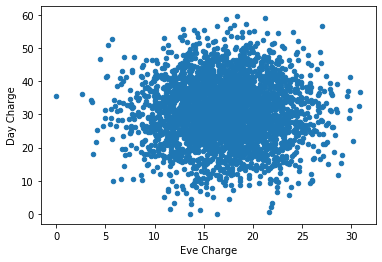

In [4]:
data.plot(kind="scatter",x="Eve Charge", y="Day Charge")

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

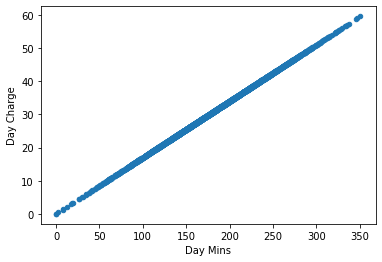

In [5]:
data.plot(kind="scatter",x="Day Mins", y="Day Charge")

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

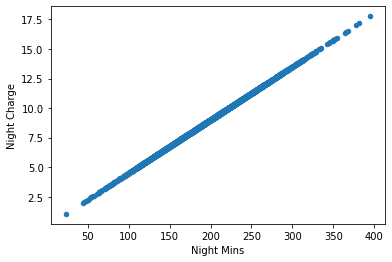

In [6]:
data.plot(kind="scatter",x="Night Mins", y="Night Charge")

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

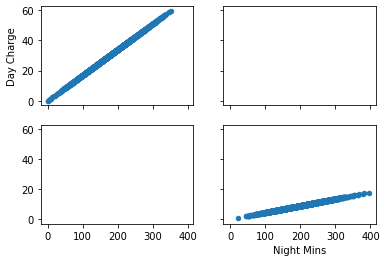

In [7]:
figure, axs = plt.subplots(2,2,sharex=True,sharey=True)
data.plot(kind="scatter", x="Day Mins", y="Day Charge",ax=axs[0][0])
data.plot(kind="scatter", x="Night Mins", y="Night Charge",ax=axs[1][1])

# Histograma de frecuencias 

Text(0.5, 1.0, 'Histograma del numero de llamadas al dia')

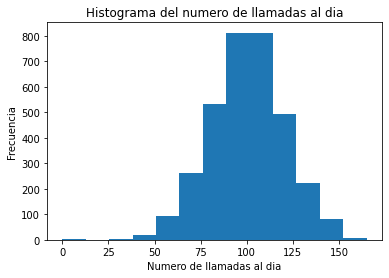

In [48]:
plt.hist(data['Day Calls'], bins=int(np.ceil(1+np.log2(3333))))
plt.xlabel("Numero de llamadas al dia")
plt.ylabel("Frecuencia")
plt.title("Histograma del numero de llamadas al dia")

In [12]:
data.shape

(3333, 21)

## boxplot

Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

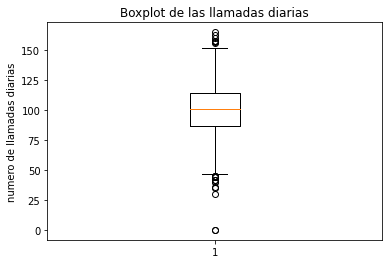

In [49]:
plt.boxplot(data['Day Calls'])
plt.ylabel('numero de llamadas diarias')
plt.title('Boxplot de las llamadas diarias')

las bolitas son outlayer, valores fuera de lugar, sirven para las categorias

In [53]:
data['Day Calls'].sum().mean()

334752.0

In [52]:
data['Day Calls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [56]:
IQR=data['Day Calls'].quantile(0.75)-data['Day Calls'].quantile(0.25)  # 27.0

In [57]:
data["Day Calls"].quantile(0.25) - 1.5*IQR

46.5

In [58]:
data["Day Calls"].quantile(0.75) + 1.5*IQR

154.5

# 40. Buscar un subconjunto de datos de un dataset

In [73]:
data40= pd.read_csv('datasets/customer-churn-model/Customer Churn Model.txt', sep=',', header=0)

In [74]:
data40.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


## Crear un subconjunto de datos

In [75]:
account_length=data40['Account Length']

In [76]:
account_length.head()

0    128
1    107
2    137
3     84
4     75
Name: Account Length, dtype: int64

In [81]:
type(account_length)

pandas.core.series.Series

In [84]:
subset=data40[['Account Length','Phone','Eve Calls','Day Calls']]

In [88]:
type(subset)

pandas.core.frame.DataFrame

In [92]:
desired_columns = ['Account Length','Phone','Eve Calls','Day Calls','Area Code']

subset = data40[desired_columns]

subset.head()

,Account Length,Phone,Eve Calls,Day Calls,Area Code
0,128,382-4657,99,110,415
1,107,371-7191,103,123,415
2,137,358-1921,110,114,415
3,84,375-9999,88,71,408
4,75,330-6626,122,113,415
